## Visualizations

In [10]:
import pandas as pd
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import MinMaxScaler
import wordcloud
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
by_isrc = pd.read_csv('by_isrc_oldest.csv')

In [12]:
by_isrc.head().T

,0,1,2,3,4
isrc,AEA040700577,AEA040700578,AEA040700579,AEA040700580,AEA040700581
genres,"['j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop', 'pop']"
name,Bala Wala Chi,Houdou Nisbi,Nafs Al Sheghlat,Yalla Kichou Barra,Ma Tfel
artists,Ziad Rahbani,Ziad Rahbani,Ziad Rahbani,Ziad Rahbani,Ziad Rahbani
album,Houdou Nisbi,Houdou Nisbi,Houdou Nisbi,Houdou Nisbi,Houdou Nisbi
release_date,1985-01-01,1985-01-01,1985-01-01,1985-01-01,1985-01-01
release_date_precision,day,day,day,day,day
uri,spotify:track:0fylgLeNObjVvwhd8caHqX,spotify:track:0yMFpBNCYXqwwOAg23bC8a,spotify:track:6G8l1kI8QlTD0UDIak5F8H,spotify:track:21g76Lq5Jg4QvfTDvi4PlH,spotify:track:0pKxrkFh8fxPKpkO29MYmi
spotify_id,0fylgLeNObjVvwhd8caHqX,0yMFpBNCYXqwwOAg23bC8a,6G8l1kI8QlTD0UDIak5F8H,21g76Lq5Jg4QvfTDvi4PlH,0pKxrkFh8fxPKpkO29MYmi
chart_power,NaN,NaN,NaN,NaN,NaN


In [13]:
remove_genres = ["classical", "jazz", "folk", "french", "turkish", "gospel", "samba", "piano", "mpb", "sertanejo", "pagode", "sleep", "forro", "malay", "anime", 
                 "j-idol", "comedy", "mandopop", "cantopop", "show-tunes", "emo", "romance", "j-dance", "chill", "world-music", "iranian", "idm", "metalcore", 
                 "hardstyle", "opera", "k-pop", "j-pop", "j-rock", "happy"]

## Find the biggest genres

In [14]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)

In [15]:
df.head(5).T

,0,1,2,3,4
name,That's No Way To Get Along,I Got A Problem,The Highway Is Like A Woman,Alabama Blues,Get Away Blues
artists,Robert Wilkins,Albert Collins,Albert Collins,Robert Wilkins,Robert Wilkins
album,The Original Rolling Stone,Frostbite,Frostbite,The Original Rolling Stone,The Original Rolling Stone
release_date,1980-01-01,1980-02-05,1980-02-05,1980-01-01,1980-01-01
release_date_precision,day,day,day,day,day
chart_power,NaN,NaN,NaN,NaN,NaN
spotify_id,5JKdsNzhJGpoaKBFZpOKQ3,6e2PhVePvqe7w4VNBTslef,4Qzcy6jU0yeck7IuCqGWSi,42zUiYaKltE7jFWb57fXAW,0hCrfp9WImVO6KWI30O1sM
uri,spotify:track:5JKdsNzhJGpoaKBFZpOKQ3,spotify:track:6e2PhVePvqe7w4VNBTslef,spotify:track:4Qzcy6jU0yeck7IuCqGWSi,spotify:track:42zUiYaKltE7jFWb57fXAW,spotify:track:0hCrfp9WImVO6KWI30O1sM
popularity,22,15,16,11,4
danceability,0.427,0.76,0.751,0.49,0.629


In [16]:
ct = pd.crosstab(df['isrc'], df['genres'])
# ct.reset_index(inplace=True)
ct = ct.applymap(lambda x: 1 if x > 1 else x)
ct.reset_index(inplace=True)

In [17]:
# drop genres of the DataFrame
ct = ct.set_index('isrc').drop(columns=remove_genres)

In [18]:
# find all songs which are not assigned to genre anymore and remove them
print(f'Shape before removing songs. ct: {ct.shape}; df: {df.shape}')
remove_songs = ct[ct.T.sum() == 0].index.to_list()
ct.drop(index=remove_songs, inplace=True)
df.set_index('isrc', inplace=True)
df.drop(index=remove_songs, inplace=True)
df.reset_index(inplace=True)
print(f'Shape after removing songs. ct: {ct.shape}; df: {df.shape}')

Shape before removing songs. ct: (427265, 76); df: (863828, 24)
Shape after removing songs. ct: (316490, 76); df: (712299, 24)


In [19]:
ct_sum = ct.sum()

In [20]:
ct_sum_df = pd.DataFrame(ct_sum)

In [21]:
#ct_sum_df.drop(index='isrc', inplace=True)

In [22]:
ct_sum_df.rename(columns={0: 'count'}, inplace=True)

In [23]:
sorted_genres = ct_sum_df.sort_values(by='count', ascending=False).index.to_list()

In [24]:
ct_sum_df.sort_values(by='count', ascending=False)[0:50]

,count
genres,
pop,118762
rock,93935
german,37752
punk,24275
metal,15761
country,15546
blues,12211
hard-rock,11659
soul,11099


Biggest genres is pop.

Count occurences of the top genres per year

In [25]:
by_isrc_year = by_isrc.copy()
by_isrc_year = by_isrc_year[['year', 'isrc']]
by_isrc_year = by_isrc_year.merge(ct, on=['isrc'], how='left')
by_isrc_year.set_index('year', inplace=True)

genres_by_year = by_isrc_year[sorted_genres[:50]] #used for wordcloud
genres_by_year = genres_by_year.groupby('year').sum()
genres_by_year.index = genres_by_year.index.astype(str)

by_isrc_year = by_isrc_year[sorted_genres[:10]]
by_isrc_year = by_isrc_year.groupby('year').sum()
by_isrc_year.index = by_isrc_year.index.astype(str)

## Development of features over the years

In [26]:
df = by_isrc.copy()

In [27]:
df.head(2).T

,0,1
isrc,AEA040700577,AEA040700578
genres,"['j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']"
name,Bala Wala Chi,Houdou Nisbi
artists,Ziad Rahbani,Ziad Rahbani
album,Houdou Nisbi,Houdou Nisbi
release_date,1985-01-01,1985-01-01
release_date_precision,day,day
uri,spotify:track:0fylgLeNObjVvwhd8caHqX,spotify:track:0yMFpBNCYXqwwOAg23bC8a
spotify_id,0fylgLeNObjVvwhd8caHqX,0yMFpBNCYXqwwOAg23bC8a
chart_power,NaN,NaN


In [28]:
songs_per_year = df.copy()
songs_per_year = songs_per_year[['year', 'popularity', 'danceability', 'energy',
                                 'key', 'loudness', 'mode', 'speechiness',
                                 'acousticness', 'instrumentalness', 'liveness',
                                 'valence', 'tempo', 'duration_ms',
                                 'time_signature']]
songs_per_year['count'] = -1
songs_per_year = songs_per_year.groupby("year").agg({
    "popularity": 'mean',
    'danceability': 'mean', 
    'energy': 'mean',
    'key': 'mean', 
    'loudness': 'mean', 
    'mode': 'mean', 
    'speechiness': 'mean',
    'acousticness': 'mean', 
    'instrumentalness': 'mean', 
    'liveness': 'mean',
    'valence': 'mean', 
    'tempo': 'mean', 
    'duration_ms': 'mean',
    'time_signature': 'mean',
    'count': 'count'
})
songs_per_year.reset_index(inplace=True)

In [29]:
songs_per_year['duration_min'] = songs_per_year['duration_ms'] / (1000 * 60)

In [30]:
songs_per_year.head(10)

,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,count,duration_min
0,1980,6.932103,0.499812,0.485525,5.110445,-12.356653,0.703678,0.065002,0.521989,0.169238,0.220967,0.543921,118.259726,247998.407916,3.830705,35701,4.133307
1,1981,7.112235,0.501099,0.488608,5.164865,-12.559169,0.699801,0.068562,0.511205,0.175626,0.222056,0.541400,118.658803,244699.429525,3.832266,33118,4.078324
2,1982,7.169674,0.503354,0.486809,5.193071,-12.731032,0.698866,0.077487,0.507867,0.175538,0.221643,0.531725,118.373840,247427.740306,3.835526,31926,4.123796
3,1983,7.047373,0.495283,0.471217,5.186754,-13.219378,0.687359,0.065915,0.516330,0.193409,0.217015,0.519328,117.784345,251536.693328,3.830344,34682,4.192278
4,1984,7.346757,0.491733,0.477950,5.207964,-13.240091,0.674151,0.064660,0.512988,0.188150,0.222164,0.507015,117.703958,249410.156878,3.837688,37545,4.156836
5,1985,7.163784,0.488324,0.470269,5.156586,-13.452114,0.684718,0.061279,0.523986,0.203092,0.215998,0.506548,117.184774,255583.193630,3.833289,37928,4.259720
6,1986,6.717974,0.474060,0.456206,5.176228,-13.903385,0.686777,0.062151,0.543401,0.219038,0.211249,0.486566,116.233584,256471.286957,3.829770,42184,4.274521
7,1987,6.634905,0.469873,0.443336,5.180522,-14.392384,0.692525,0.061195,0.553069,0.238068,0.207147,0.473718,116.127546,259072.147444,3.819021,50365,4.317869
8,1988,6.138412,0.464916,0.428971,5.169508,-14.948866,0.687010,0.062721,0.565367,0.260287,0.210766,0.472932,115.397637,262048.766115,3.810233,58593,4.367479
9,1989,6.067652,0.467819,0.418770,5.191640,-15.100176,0.691717,0.064646,0.572174,0.254533,0.206904,0.466538,115.049823,261012.425156,3.807026,65216,4.350207


In [31]:
songs_per_year.columns

Index(['year', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'count',
       'duration_min'],
      dtype='object')

In [32]:
songs_per_year = songs_per_year.astype({'year': str})

In [33]:
"""alt.Chart(songs_per_year).mark_bar().encode(
    alt.X("year"),
    alt.Y("count")
)"""

'alt.Chart(songs_per_year).mark_bar().encode(\n    alt.X("year"),\n    alt.Y("count")\n)'

In [34]:
features = ['popularity', 'danceability', 'energy',
            'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_min',
            'time_signature']

In [35]:
songs_per_year.head()

,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,count,duration_min
0,1980,6.932103,0.499812,0.485525,5.110445,-12.356653,0.703678,0.065002,0.521989,0.169238,0.220967,0.543921,118.259726,247998.407916,3.830705,35701,4.133307
1,1981,7.112235,0.501099,0.488608,5.164865,-12.559169,0.699801,0.068562,0.511205,0.175626,0.222056,0.541400,118.658803,244699.429525,3.832266,33118,4.078324
2,1982,7.169674,0.503354,0.486809,5.193071,-12.731032,0.698866,0.077487,0.507867,0.175538,0.221643,0.531725,118.373840,247427.740306,3.835526,31926,4.123796
3,1983,7.047373,0.495283,0.471217,5.186754,-13.219378,0.687359,0.065915,0.516330,0.193409,0.217015,0.519328,117.784345,251536.693328,3.830344,34682,4.192278
4,1984,7.346757,0.491733,0.477950,5.207964,-13.240091,0.674151,0.064660,0.512988,0.188150,0.222164,0.507015,117.703958,249410.156878,3.837688,37545,4.156836


In [36]:
"""# Create the initial scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=songs_per_year['year'],
    y=songs_per_year['duration_ms'],
    #mode='markers',
    name='Duration (ms)'
))

# Define the dropdown menu options
dropdown_options = [
    {'label': 'Duration (ms)', 'value': 'duration_ms'},
    {'label': 'Popularity', 'value': 'popularity'},
    {'label': 'Danceability', 'value': 'danceability'},
    {'label': 'Energy', 'value': 'energy'},
    {'label': 'Key', 'value': 'key'},
    {'label': 'Loudness', 'value': 'loudness'},
    {'label': 'Mode', 'value': 'mode'},
    {'label': 'Speechiness', 'value': 'speechiness'},
    {'label': 'Acousticness', 'value': 'acousticness'},
    {'label': 'Instrumentalness', 'value': 'instrumentalness'},
    {'label': 'Liveness', 'value': 'liveness'},
    {'label': 'Valence', 'value': 'valence'},
    {'label': 'Tempo', 'value': 'tempo'},
    {'label': 'Time Signature', 'value': 'time_signature'},
    {'label': 'Count', 'value': 'count'},
    {'label': 'Duration (min)', 'value': 'duration_min'}
]

# Create the dropdown menu
dropdown_menu = go.layout.Updatemenu(
    buttons=list([
        dict(
            args=[
                {'y': [songs_per_year[option['value']]]}, 
                {'yaxis': {'title': option['label'].capitalize()}}
            ],
            label=option['label'],
            method='update'
        )
        for option in dropdown_options
    ]),
    direction='down',
    showactive=True,
)

# Update the layout with dropdown menu and initial y-axis title
fig.update_layout(
    height = 800,
    updatemenus=[dropdown_menu],
    yaxis_title='Duration (ms)',
    xaxis_title='year',
    title='Development of features',
    showlegend=True
)

fig.show()"""

"# Create the initial scatter plot\nfig = go.Figure()\n\nfig.add_trace(go.Scatter(\n    x=songs_per_year['year'],\n    y=songs_per_year['duration_ms'],\n    #mode='markers',\n    name='Duration (ms)'\n))\n\n# Define the dropdown menu options\ndropdown_options = [\n    {'label': 'Duration (ms)', 'value': 'duration_ms'},\n    {'label': 'Popularity', 'value': 'popularity'},\n    {'label': 'Danceability', 'value': 'danceability'},\n    {'label': 'Energy', 'value': 'energy'},\n    {'label': 'Key', 'value': 'key'},\n    {'label': 'Loudness', 'value': 'loudness'},\n    {'label': 'Mode', 'value': 'mode'},\n    {'label': 'Speechiness', 'value': 'speechiness'},\n    {'label': 'Acousticness', 'value': 'acousticness'},\n    {'label': 'Instrumentalness', 'value': 'instrumentalness'},\n    {'label': 'Liveness', 'value': 'liveness'},\n    {'label': 'Valence', 'value': 'valence'},\n    {'label': 'Tempo', 'value': 'tempo'},\n    {'label': 'Time Signature', 'value': 'time_signature'},\n    {'label': 'Co

In [37]:
songs_per_year_genres = songs_per_year.merge(by_isrc_year, on='year', how='right')

#Create the initial scatter plot for genre 'pop'
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=songs_per_year_genres['year'],
    y=songs_per_year_genres['duration_ms'],
    #mode='line',
    name='pop',
    visible=True
))

# Add separate scatter plots for each genre
genres = ['rock', 'classical', 'german', 'jazz', 'folk', 'punk', 'metal', 'country', 'french']

for genre in genres:
    fig.add_trace(go.Scatter(
        x=songs_per_year_genres['year'],
        y=songs_per_year_genres['duration_ms'],
        #mode='line',
        name=genre,
        visible=False
    ))

# Create the dropdown menu for y-axis selection
dropdown_options = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                    'valence', 'tempo', 'duration_min']

dropdown_menu = go.layout.Updatemenu(
    buttons=list([
        dict(
            args=[{'y': [songs_per_year_genres[option]]}],
            #label=option.capitalize(),
            method='update'
        )
        for option in dropdown_options
    ]),
    direction='down',
    showactive=True,
)

# Create the legend to toggle genre visibility
legend = dict(
    title='Genre',
    orientation='h',
    y=1.1,
    x=0.5,
    xanchor='center',
    bgcolor='rgba(255, 255, 255, 0.5)'
)

# Update the layout with dropdown menu, legend, and initial y-axis title
fig.update_layout(
    height = 800,
    updatemenus=[dropdown_menu],
    legend=legend,
    yaxis_title='Duration (ms)',
    title='Song Duration by Genre',
    xaxis_title='Year',
    showlegend=True
)

# Add custom buttons to toggle genre visibility in the legend
for i, genre in enumerate(genres):
    button = dict(
        label=genre.capitalize(),
        method='update',
        args=[{'visible': [True if j == i+1 else False for j in range(len(genres)+1)]}]
    )
    fig.update_traces(showlegend=True if genre == 'pop' else False, selector=dict(name=genre))
    fig.update_layout({'updatemenus': [{'buttons': [button]}]})

#fig.show()

## Development of genres of the years

### Top 10 Genres per Year in Line Chart

In [38]:
"""features = sorted_genres[:10]"""

'features = sorted_genres[:10]'

In [39]:
"""dev_genres_df = by_isrc_year.reset_index()"""

'dev_genres_df = by_isrc_year.reset_index()'

In [40]:
"""dev_genres_df"""

'dev_genres_df'

In [41]:
"""# Create the initial scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dev_genres_df['year'],
    y=dev_genres_df['pop'],
    #mode='markers',
    name='Pop'
))

# Create the dropdown menu
dropdown_menu = go.layout.Updatemenu(
    buttons=list([
        dict(
            args=[
                {'y': [dev_genres_df[option]]}, 
                {'yaxis': {'title': option.capitalize()}}
            ],
            label=option,
            method='update'
        )
        for option in features
    ]),
    direction='down',
    showactive=True,
)

# Update the layout with dropdown menu and initial y-axis title
fig.update_layout(
    height = 800,
    updatemenus=[dropdown_menu],
    yaxis_title='pop',
    xaxis_title='year',
    title='Development of features'
)

fig.show()"""

"# Create the initial scatter plot\nfig = go.Figure()\n\nfig.add_trace(go.Scatter(\n    x=dev_genres_df['year'],\n    y=dev_genres_df['pop'],\n    #mode='markers',\n    name='Pop'\n))\n\n# Create the dropdown menu\ndropdown_menu = go.layout.Updatemenu(\n    buttons=list([\n        dict(\n            args=[\n                {'y': [dev_genres_df[option]]}, \n                {'yaxis': {'title': option.capitalize()}}\n            ],\n            label=option,\n            method='update'\n        )\n        for option in features\n    ]),\n    direction='down',\n    showactive=True,\n)\n\n# Update the layout with dropdown menu and initial y-axis title\nfig.update_layout(\n    height = 800,\n    updatemenus=[dropdown_menu],\n    yaxis_title='pop',\n    xaxis_title='year',\n    title='Development of features'\n)\n\nfig.show()"

## Add the genres to the features

In [42]:
"""df.head()"""

'df.head()'

In [43]:
"""scaler = MinMaxScaler()
by_isrc_scaled = by_isrc.copy()
by_isrc_scaled.set_index('isrc', inplace=True)
by_isrc_scaled = by_isrc_scaled[['danceability', 'energy',
                       'key', 'loudness', 'mode', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'time_signature', 'tempo']]
by_isrc_scaled = pd.DataFrame(scaler.fit_transform(by_isrc_scaled), columns=by_isrc_scaled.columns, index = by_isrc_scaled.index)
by_isrc_scaled.reset_index(inplace=True)"""

"scaler = MinMaxScaler()\nby_isrc_scaled = by_isrc.copy()\nby_isrc_scaled.set_index('isrc', inplace=True)\nby_isrc_scaled = by_isrc_scaled[['danceability', 'energy',\n                       'key', 'loudness', 'mode', 'speechiness',\n                       'acousticness', 'instrumentalness', 'liveness',\n                       'valence', 'time_signature', 'tempo']]\nby_isrc_scaled = pd.DataFrame(scaler.fit_transform(by_isrc_scaled), columns=by_isrc_scaled.columns, index = by_isrc_scaled.index)\nby_isrc_scaled.reset_index(inplace=True)"

In [44]:
"""by_isrc_genres = ct.merge(by_isrc_scaled, on=['isrc'], how='right')"""

"by_isrc_genres = ct.merge(by_isrc_scaled, on=['isrc'], how='right')"

In [45]:
"""by_isrc_genres.head()"""

'by_isrc_genres.head()'

## Create Radar Chart for the top 10 genres

In [46]:
"""sorted_genres[:10]"""

'sorted_genres[:10]'

In [47]:
"""fig = go.Figure()
for genre in sorted_genres[:10]:
    df_copy = by_isrc_genres.copy()
    df_copy = df_copy[df_copy[genre] == 1]
    df_copy = df_copy[['danceability', 'energy',
                       'key', 'loudness', 'mode', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'time_signature', 'tempo', 'danceability']]
    df_radar = pd.DataFrame(df_copy.mean(), columns=['mean'])
    df_radar.reset_index(inplace=True)
    df_radar.rename(columns={"index":"feature"}, inplace=True)

    fig.add_trace(go.Scatterpolar(
        r = df_radar['mean'],
        theta = df_radar['feature'],
        mode = 'lines',
        fill = 'none',
        name = genre
    ))"""

'fig = go.Figure()\nfor genre in sorted_genres[:10]:\n    df_copy = by_isrc_genres.copy()\n    df_copy = df_copy[df_copy[genre] == 1]\n    df_copy = df_copy[[\'danceability\', \'energy\',\n                       \'key\', \'loudness\', \'mode\', \'speechiness\',\n                       \'acousticness\', \'instrumentalness\', \'liveness\',\n                       \'valence\', \'time_signature\', \'tempo\', \'danceability\']]\n    df_radar = pd.DataFrame(df_copy.mean(), columns=[\'mean\'])\n    df_radar.reset_index(inplace=True)\n    df_radar.rename(columns={"index":"feature"}, inplace=True)\n\n    fig.add_trace(go.Scatterpolar(\n        r = df_radar[\'mean\'],\n        theta = df_radar[\'feature\'],\n        mode = \'lines\',\n        fill = \'none\',\n        name = genre\n    ))'

In [48]:
"""fig.update_layout(
    height = 800
)
fig.show()"""

'fig.update_layout(\n    height = 800\n)\nfig.show()'

# Update!

remove unuseful genres 

In [96]:
df_remove_genres = by_isrc[~by_isrc['genres'].str.contains('|'.join(remove_genres))]
df_remove_genres

,isrc,genres,name,artists,album,release_date,release_date_precision,uri,spotify_id,chart_power,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
12,AEA0Q1900049,['pop'],Asi Jina Sohneyan,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4gEJ7dAwc67EMzojM8yZW8,4gEJ7dAwc67EMzojM8yZW8,NaN,...,1,0.0718,0.773,0.000004,0.3660,0.857,106.167,326430,4,1989
13,AEA0Q1900050,['pop'],Oh Na Ro Dil Merey Tun,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:1sfQm4tPUxutEyX89xBNKd,1sfQm4tPUxutEyX89xBNKd,NaN,...,1,0.0746,0.819,0.000000,0.1260,0.847,127.191,383388,4,1989
14,AEA0Q1900051,['pop'],Nazaraan Tun Dur Ho Kay,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4lynOHGcyNVvReUJ8ivLXr,4lynOHGcyNVvReUJ8ivLXr,NaN,...,1,0.0373,0.677,0.000001,0.0769,0.965,118.307,389803,4,1989
15,AEA0Q1900052,['pop'],Koyi Raawan Ch Beh (Mahiye),Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:5GIYaE4QwbbTxDdI0KfoiX,5GIYaE4QwbbTxDdI0KfoiX,NaN,...,1,0.0502,0.735,0.001930,0.2080,0.791,110.104,724500,4,1989
16,AEA0Q1900053,['pop'],Ja Ni Tun Khushiyan Maaney,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:0T2eReINvdY0aiAko9Tss7,0T2eReINvdY0aiAko9Tss7,NaN,...,1,0.0436,0.777,0.000000,0.1400,0.929,124.521,421667,4,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427250,ved049201122,['rock'],No Es Igual,Aditus,Algo Electrico,1987-08-11,day,spotify:track:1uxjGM0PZf1FvcAG3WE0qe,1uxjGM0PZf1FvcAG3WE0qe,NaN,...,1,0.0427,0.789,0.000000,0.7820,0.657,130.866,227602,4,1987
427251,ved049201123,"['pop', 'rock']",Que Le Vamos a Hacer,Aditus,Algo Electrico,1987-08-11,day,spotify:track:5hq2FdGbJbOWroooOBqEjL,5hq2FdGbJbOWroooOBqEjL,NaN,...,0,0.0713,0.473,0.000005,0.9040,0.730,111.497,226139,4,1987
427252,ved049201554,"['pop', 'rock']",La Ultima Carta,Aditus,Algo Electrico,1987-08-11,day,spotify:track:0SllqDSKFLgprVFEGybJta,0SllqDSKFLgprVFEGybJta,NaN,...,1,0.0344,0.747,0.000000,0.6600,0.430,80.388,246410,4,1987
427253,ved049201555,"['pop', 'rock']",La Vida No Me Alcanzara,Aditus,Algo Electrico,1987-08-11,day,spotify:track:4Y7scZtprxUexjnLTC0u3R,4Y7scZtprxUexjnLTC0u3R,NaN,...,1,0.0412,0.778,0.000027,0.3590,0.898,149.152,215574,4,1987


split genres into single string

In [97]:
from ast import literal_eval

df_remove_genres['genres'] = df_remove_genres['genres'].apply(literal_eval)
df_split_genres = df_remove_genres.explode('genres')

### Word Cloud for Genres

drop duplicates values with same song name and genres and year, because we only want to focus the frequency of genres now

In [98]:
final_genres = df_split_genres.drop_duplicates(["name","genres","year"])
final_genres

,isrc,genres,name,artists,album,release_date,release_date_precision,uri,spotify_id,chart_power,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
12,AEA0Q1900049,pop,Asi Jina Sohneyan,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4gEJ7dAwc67EMzojM8yZW8,4gEJ7dAwc67EMzojM8yZW8,NaN,...,1,0.0718,0.773,0.000004,0.3660,0.857,106.167,326430,4,1989
13,AEA0Q1900050,pop,Oh Na Ro Dil Merey Tun,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:1sfQm4tPUxutEyX89xBNKd,1sfQm4tPUxutEyX89xBNKd,NaN,...,1,0.0746,0.819,0.000000,0.1260,0.847,127.191,383388,4,1989
14,AEA0Q1900051,pop,Nazaraan Tun Dur Ho Kay,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4lynOHGcyNVvReUJ8ivLXr,4lynOHGcyNVvReUJ8ivLXr,NaN,...,1,0.0373,0.677,0.000001,0.0769,0.965,118.307,389803,4,1989
15,AEA0Q1900052,pop,Koyi Raawan Ch Beh (Mahiye),Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:5GIYaE4QwbbTxDdI0KfoiX,5GIYaE4QwbbTxDdI0KfoiX,NaN,...,1,0.0502,0.735,0.001930,0.2080,0.791,110.104,724500,4,1989
16,AEA0Q1900053,pop,Ja Ni Tun Khushiyan Maaney,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:0T2eReINvdY0aiAko9Tss7,0T2eReINvdY0aiAko9Tss7,NaN,...,1,0.0436,0.777,0.000000,0.1400,0.929,124.521,421667,4,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427252,ved049201554,pop,La Ultima Carta,Aditus,Algo Electrico,1987-08-11,day,spotify:track:0SllqDSKFLgprVFEGybJta,0SllqDSKFLgprVFEGybJta,NaN,...,1,0.0344,0.747,0.000000,0.6600,0.430,80.388,246410,4,1987
427252,ved049201554,rock,La Ultima Carta,Aditus,Algo Electrico,1987-08-11,day,spotify:track:0SllqDSKFLgprVFEGybJta,0SllqDSKFLgprVFEGybJta,NaN,...,1,0.0344,0.747,0.000000,0.6600,0.430,80.388,246410,4,1987
427253,ved049201555,pop,La Vida No Me Alcanzara,Aditus,Algo Electrico,1987-08-11,day,spotify:track:4Y7scZtprxUexjnLTC0u3R,4Y7scZtprxUexjnLTC0u3R,NaN,...,1,0.0412,0.778,0.000027,0.3590,0.898,149.152,215574,4,1987
427253,ved049201555,rock,La Vida No Me Alcanzara,Aditus,Algo Electrico,1987-08-11,day,spotify:track:4Y7scZtprxUexjnLTC0u3R,4Y7scZtprxUexjnLTC0u3R,NaN,...,1,0.0412,0.778,0.000027,0.3590,0.898,149.152,215574,4,1987


calculate the frequency of each genre

In [99]:
genre_counts = final_genres['genres'].value_counts().reset_index()

genre_counts.columns = ['genres', 'count']
genre_counts

,genres,count
0,pop,93239
1,rock,76443
2,punk,22283
3,metal,14310
4,country,11690
...,...,...
71,breakbeat,19
72,party,18
73,edm,16
74,drum-and-bass,5


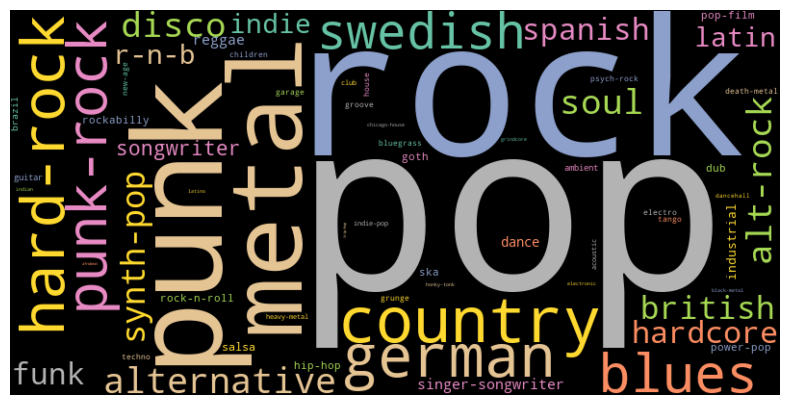

In [100]:
genre_counts = genre_counts.sort_values(by='count', ascending=False)
genre_counts_dict = genre_counts.set_index('genres')['count'].to_dict()
cloud = wordcloud.WordCloud(width=800, height=400, background_color='black',colormap='Set2').generate_from_frequencies(genre_counts_dict)
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud for Genres per Year

In [104]:
# Count occurrences of genres per year
genre_counts_per_year = final_genres.groupby(['year', 'genres']).size().reset_index(name='count')

# Get the top 50 genres per year
top50_genres_per_year = genre_counts_per_year.groupby('year').apply(lambda x: x.nlargest(50, 'count')).reset_index(drop=True)

# Create a new DataFrame to store the results
genres_count_by_year = pd.DataFrame(top50_genres_per_year)
genres_count_by_year

,year,genres,count
0,1980,pop,9049
1,1980,rock,6676
2,1980,punk,2041
3,1980,country,1347
4,1980,disco,1268
...,...,...,...
495,1989,acoustic,210
496,1989,bluegrass,181
497,1989,garage,178
498,1989,club,168


In [105]:
genres_year_pivot = genres_count_by_year.pivot(index='year', columns='genres', values='count') \
.fillna(0) \
.reset_index() \
.rename_axis(None, axis=1)

There are several null values after pivot the dataframe, because some genres doesn't exist in some years. But it doesn't matter for our purpose

In [114]:
genres_year_pivot

,year,acoustic,afrobeat,alt-rock,alternative,ambient,black-metal,bluegrass,blues,brazil,...,salsa,singer-songwriter,ska,songwriter,soul,spanish,swedish,synth-pop,tango,techno
0,1980,55.0,30.0,473.0,524.0,45.0,0.0,91.0,934.0,42.0,...,325.0,391.0,290.0,391.0,1029.0,306.0,773.0,422.0,216.0,81.0
1,1981,103.0,0.0,547.0,567.0,98.0,0.0,94.0,826.0,112.0,...,231.0,400.0,113.0,400.0,1040.0,148.0,904.0,624.0,86.0,128.0
2,1982,43.0,33.0,409.0,420.0,100.0,0.0,65.0,779.0,61.0,...,250.0,713.0,242.0,713.0,1000.0,428.0,766.0,641.0,59.0,96.0
3,1983,89.0,0.0,482.0,516.0,150.0,0.0,106.0,721.0,165.0,...,216.0,411.0,115.0,411.0,773.0,417.0,819.0,691.0,84.0,107.0
4,1984,74.0,0.0,640.0,664.0,111.0,0.0,128.0,715.0,117.0,...,213.0,407.0,147.0,407.0,661.0,610.0,735.0,840.0,87.0,163.0
5,1985,0.0,0.0,632.0,678.0,159.0,66.0,0.0,473.0,167.0,...,325.0,401.0,158.0,401.0,553.0,689.0,768.0,829.0,91.0,151.0
6,1986,0.0,0.0,857.0,911.0,264.0,0.0,0.0,652.0,270.0,...,196.0,412.0,156.0,412.0,544.0,639.0,672.0,737.0,126.0,139.0
7,1987,0.0,0.0,1209.0,1231.0,217.0,0.0,193.0,805.0,283.0,...,247.0,351.0,265.0,351.0,578.0,793.0,809.0,713.0,191.0,0.0
8,1988,0.0,0.0,1063.0,1211.0,166.0,0.0,198.0,1060.0,199.0,...,343.0,499.0,344.0,499.0,687.0,801.0,843.0,537.0,158.0,0.0
9,1989,210.0,0.0,1108.0,1156.0,221.0,0.0,181.0,1467.0,314.0,...,428.0,361.0,397.0,361.0,771.0,1000.0,1113.0,680.0,0.0,0.0


In [115]:
genres_by_year = genres_year_pivot.set_index('year')

In [116]:
genres_by_year = genres_by_year.to_dict('index')

In [117]:
genres_by_year

{1980: {'acoustic': 55.0,
  'afrobeat': 30.0,
  'alt-rock': 473.0,
  'alternative': 524.0,
  'ambient': 45.0,
  'black-metal': 0.0,
  'bluegrass': 91.0,
  'blues': 934.0,
  'brazil': 42.0,
  'british': 557.0,
  'children': 0.0,
  'club': 0.0,
  'country': 1347.0,
  'dance': 166.0,
  'dancehall': 0.0,
  'death-metal': 0.0,
  'disco': 1268.0,
  'dub': 181.0,
  'electro': 80.0,
  'electronic': 54.0,
  'funk': 778.0,
  'garage': 64.0,
  'german': 581.0,
  'goth': 52.0,
  'groove': 110.0,
  'grunge': 0.0,
  'guitar': 96.0,
  'hard-rock': 894.0,
  'hardcore': 372.0,
  'heavy-metal': 0.0,
  'hip-hop': 0.0,
  'honky-tonk': 43.0,
  'house': 63.0,
  'indian': 0.0,
  'indie': 204.0,
  'indie-pop': 0.0,
  'industrial': 112.0,
  'latin': 195.0,
  'latino': 0.0,
  'metal': 703.0,
  'new-age': 0.0,
  'pop': 9049.0,
  'pop-film': 195.0,
  'power-pop': 276.0,
  'psych-rock': 131.0,
  'punk': 2041.0,
  'punk-rock': 917.0,
  'r-n-b': 270.0,
  'reggae': 307.0,
  'rock': 6676.0,
  'rock-n-roll': 202.0,
  '

In [118]:
def wc(df):
    clear_output(wait=True)
    cloud = wordcloud.WordCloud(width=700, height=400, background_color='black').generate_from_frequencies(df)
    plt.figure(figsize=(9, 9))
    plt.imshow(cloud)
    plt.tight_layout()
    plt.axis("off")

In [120]:
dropdown = widgets.Dropdown(options = genres_by_year,
                                value=genres_by_year[1980],
                                 description= "year" )

widgets.interact(wc,df=dropdown)

interactive(children=(Dropdown(description='year', options={1980: {'acoustic': 55.0, 'afrobeat': 30.0, 'alt-ro…

<function __main__.wc(df)>

#### Popularity of Artists in Word Cloud

split artists

In [123]:
df_artists = df_split_genres.drop_duplicates(["name","year"])

In [124]:
df_artists["artists"].unique()

array(['Akram Rahi', 'Walid Toufic',
       'Patricio Rey y sus Redonditos de Ricota', ..., 'Jerome Grey,AVA',
       'Ahmad Shamlu,Fereydun Shahbazian',
       'Ahmad Shamlu,Mohammad-Reza Shajarian,Fereydun Shahbazian'],
      dtype=object)

In [125]:
df_artists['artists'] = df_artists['artists'].str.split(',')
df_split_artists = df_artists.explode('artists')

In [126]:
df_split_artists["artists"].unique()

array(['Akram Rahi', 'Walid Toufic',
       'Patricio Rey y sus Redonditos de Ricota', ..., 'AVA',
       'Fereydun Shahbazian', 'Mohammad-Reza Shajarian'], dtype=object)

In [127]:
df_artist_popularity_per_year = (
    df_split_artists.groupby(['year', 'artists'])
    .agg({'popularity': 'sum'})
    .groupby('year', as_index=False)
    .apply(lambda group: group.nlargest(10, columns='popularity'))
    .reset_index(level=0, drop=True)
    .reset_index()
    .pivot(index='year', columns='artists', values='popularity')
    .fillna(0)
    .astype(float)
    .to_dict(orient='index')
)

In [128]:
dropdown = widgets.Dropdown(options = df_artist_popularity_per_year,
                                value=df_artist_popularity_per_year[1980],
                                 description= "year" )

widgets.interact(wc,df=dropdown)

interactive(children=(Dropdown(description='year', options={1980: {' Jr.': 0.0, '5 Geschwister': 0.0, 'ABBA': …

<function __main__.wc(df)>

Popularity per Artists in Word Cloud

In [129]:
def wordcloud_artists(counts):
    cloud = wordcloud.WordCloud(width=800, height=400, background_color='black',colormap=matplotlib.cm.inferno).generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [70]:
#artists_popularity = df_split_artists.drop_duplicates(["name","release_date","artists"])

In [130]:
artists_popularity = df_split_artists.groupby("artists", as_index=False)["popularity"].sum()

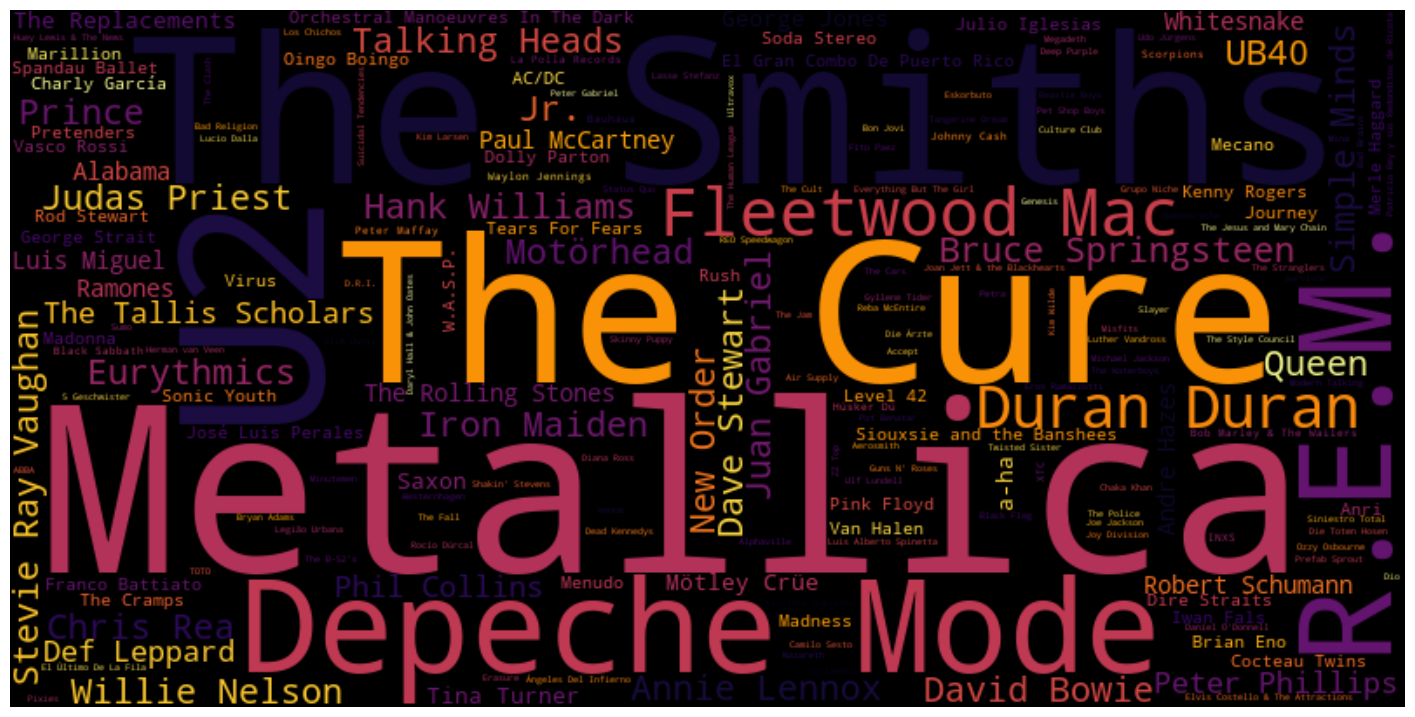

In [131]:
artist_popularity_tuples = [tuple(x) for x in artists_popularity.values]
wordcloud_artists(dict(artist_popularity_tuples))

### Chart Score

In [73]:
df_chart_power = by_isrc[by_isrc['chart_power'].notna()]
df_chart_power

,isrc,genres,name,artists,album,release_date,release_date_precision,uri,spotify_id,chart_power,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
5347,ATB158200015,"['german', 'pop']",Maschine brennt,Falco,Maschine Brennt EP,1982,year,spotify:track:17K7V8GKGpUMiepuovI797,17K7V8GKGpUMiepuovI797,1239.0,...,1,0.0664,0.07180,0.000076,0.0844,0.964,112.753,219971,4,1982
5349,ATB158200018,"['german', 'pop']",Der Kommissar,Falco,Einzelhaft,1982-02-19,day,spotify:track:3TBRJsLCcwroEkA3tD4u2N,3TBRJsLCcwroEkA3tD4u2N,2394.0,...,1,0.0457,0.05260,0.000005,0.0390,0.950,118.242,232588,4,1982
5355,ATB158500018,"['german', 'pop']",Rock Me Amadeus,Falco,Falco 3,1985-02-19,day,spotify:track:0DfG1ltJnZyq4Tx3ZLL7ZU,0DfG1ltJnZyq4Tx3ZLL7ZU,1924.0,...,0,0.1330,0.29600,0.003360,0.0884,0.890,176.735,202236,4,1985
5357,ATB158500020,"['german', 'pop']",Vienna Calling,Falco,Vienna Calling EP,1985,year,spotify:track:5wdPxVeUmUmUi6SI11ahcc,5wdPxVeUmUmUi6SI11ahcc,1082.0,...,0,0.0721,0.23900,0.000004,0.2080,0.963,131.566,248871,4,1985
6860,AUAP08000041,"['hard-rock', 'rock']",Hells Bells,AC/DC,Back In Black,1980-07-25,day,spotify:track:69QHm3pustz01CJRwdo20z,69QHm3pustz01CJRwdo20z,1019.0,...,0,0.0475,0.00532,0.005500,0.2730,0.303,106.767,312293,4,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416459,USY251825591,['rock'],Let's Dance,David Bowie,Montreal 1983,1983,year,spotify:track:2rBy5yEUU9BcOcorGJafpq,2rBy5yEUU9BcOcorGJafpq,1783.0,...,0,0.0784,0.01290,0.032400,0.9550,0.498,124.842,284500,4,1983
416461,USY251825593,['rock'],China Girl,David Bowie,Montreal 1983,1983,year,spotify:track:0tw3lokOVUYgJN8XTCQyWw,0tw3lokOVUYgJN8XTCQyWw,1162.0,...,0,0.0377,0.08460,0.277000,0.9580,0.598,134.958,312007,4,1983
416465,USY251825597,['rock'],Ashes To Ashes,David Bowie,Montreal 1983,1983,year,spotify:track:1bCk0bRH2QZViZLQ2cyEoV,1bCk0bRH2QZViZLQ2cyEoV,1472.0,...,0,0.0438,0.07220,0.001140,0.3440,0.761,133.883,222453,4,1983
416630,USY251946386,"['blues', 'j-rock', 'jazz', 'metal', 'psych-ro...",Bobby Brown,Frank Zappa,"Goblins, Witches & Kings",1982,year,spotify:track:5HSPXMA9zu2ToPCwxDBlms,5HSPXMA9zu2ToPCwxDBlms,2570.0,...,1,0.1040,0.75900,0.041600,0.5440,0.586,80.699,185783,4,1982


average of chart score per artists

In [74]:
avg_chart = df_chart_power.groupby("artists")["chart_power"].sum().reset_index()
avg_chart

,artists,chart_power
0,A Flock Of Seagulls,2479.0
1,ABBA,7989.0
2,AC/DC,2587.0
3,Ace Cats,746.0
4,Achim Reichel,757.0
...,...,...
315,Yazoo,3306.0
316,Yazz,1169.0
317,Yello,952.0
318,Yes,1169.0


Chart Score per Artists in Word Cloud

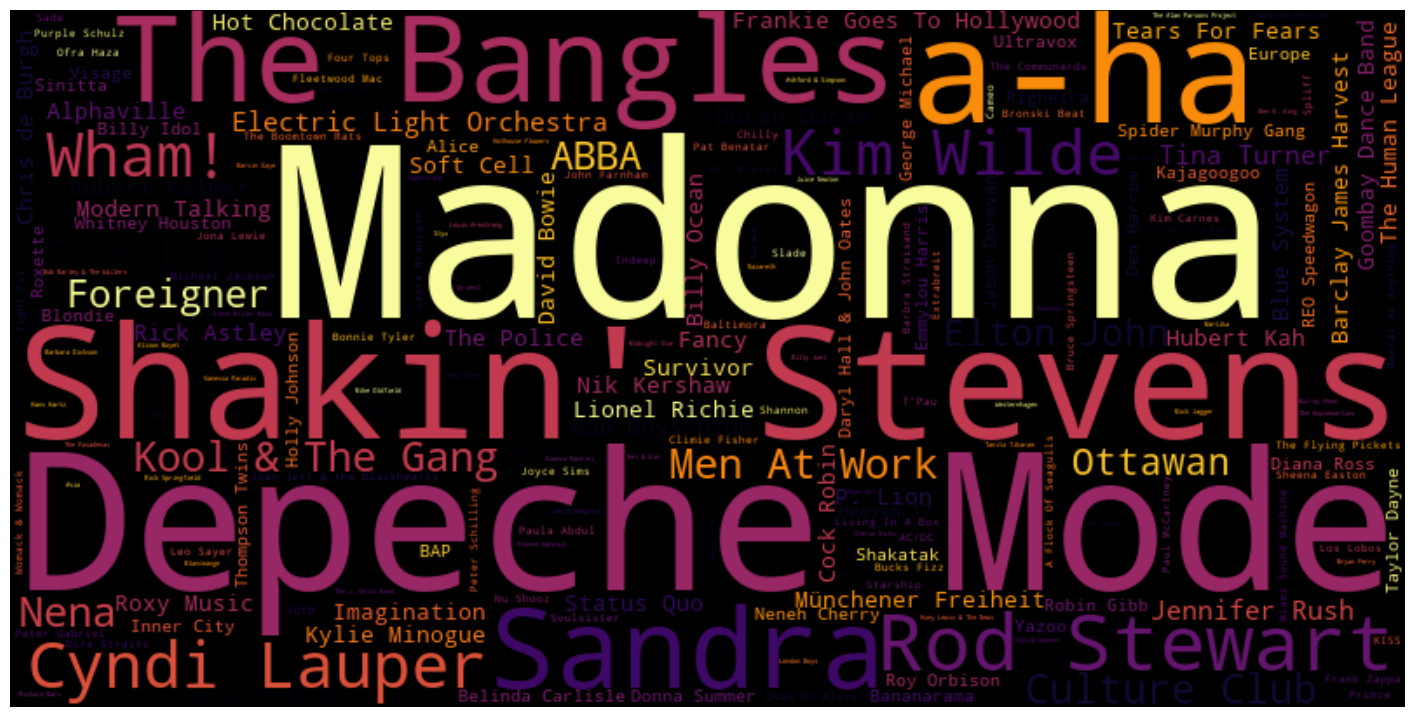

In [75]:
avg_chart_tuples = [tuple(x) for x in avg_chart.values]
wordcloud_artists(dict(avg_chart_tuples))

Merge data with popularity and chart score

In [132]:
merge = artists_popularity.merge(avg_chart, on='artists',how="outer")
merge.sort_values('popularity',ascending=False)

,artists,popularity,chart_power
8254,Metallica,7887.0,NaN
12770,The Smiths,5753.0,NaN
13326,U2,5653.0,919.0
12360,The Cure,5436.0,NaN
2879,Depeche Mode,5085.0,19890.0
...,...,...,...
14230,Mezzoforte,NaN,782.0
14231,Ottawan,NaN,7525.0
14232,Supertramp,NaN,1633.0
14233,Tony Esposito,NaN,1116.0


In [133]:
merge.rename({"chart_power":"chart_score"},axis=1, inplace=True)
merge

,artists,popularity,chart_score
0,Ance,79.0,NaN
1,And His Rainbow Ranch Boys,29.0,NaN
2,Cambridge,7.0,NaN
3,Das,0.0,NaN
4,Jane,136.0,NaN
...,...,...,...
14230,Mezzoforte,NaN,782.0
14231,Ottawan,NaN,7525.0
14232,Supertramp,NaN,1633.0
14233,Tony Esposito,NaN,1116.0


In [134]:
merge.sort_values(['chart_score'],ascending=False).head(20)

,artists,popularity,chart_score
7650,Madonna,2517.0,24442.0
2879,Depeche Mode,5085.0,19890.0
11207,Shakin' Stevens,1975.0,17255.0
14080,a-ha,3097.0,15372.0
12251,The Bangles,1.0,13935.0
10971,Sandra,1058.0,12075.0
10607,Rod Stewart,2513.0,12012.0
2458,Cyndi Lauper,1277.0,11378.0
6569,Kim Wilde,2074.0,11016.0
13769,Wham!,1555.0,10628.0


Top 20 popular Artists from Spotify vs. from Chart Score

In [135]:
top20_popu = merge.nlargest(20, 'popularity').reset_index(drop=True)
top20_score = merge.nlargest(20, 'chart_score').reset_index(drop=True)

In [136]:
top20_popu

,artists,popularity,chart_score
0,Metallica,7887.0,NaN
1,The Smiths,5753.0,NaN
2,U2,5653.0,919.0
3,The Cure,5436.0,NaN
4,Depeche Mode,5085.0,19890.0
5,R.E.M.,5067.0,NaN
6,Fleetwood Mac,4865.0,2583.0
7,Duran Duran,4474.0,5465.0
8,Bruce Springsteen,4260.0,1927.0
9,Talking Heads,4128.0,NaN


In [137]:
top20_score

,artists,popularity,chart_score
0,Madonna,2517.0,24442.0
1,Depeche Mode,5085.0,19890.0
2,Shakin' Stevens,1975.0,17255.0
3,a-ha,3097.0,15372.0
4,The Bangles,1.0,13935.0
5,Sandra,1058.0,12075.0
6,Rod Stewart,2513.0,12012.0
7,Cyndi Lauper,1277.0,11378.0
8,Kim Wilde,2074.0,11016.0
9,Wham!,1555.0,10628.0


In [138]:
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Top 20 Popularity Artists', 'Top 20 Chart Score Artists'))

# Add bar trace for top popularity artists
fig.add_trace(go.Bar(x=top20_popu['popularity'], y=top20_popu['artists'],
                     orientation='h', name='Popularity Artists'), row=1, col=1)

# Add bar trace for top chart score artists
fig.add_trace(go.Bar(x=top20_score['chart_score'], y=top20_score['artists'],
                     orientation='h', name='Chart Score Artists'), row=1, col=2)

# Update layout
fig.update_layout(#title='Top 20 Artists',
                  yaxis=dict(autorange="reversed"),
                  yaxis2=dict(autorange="reversed"),
                    width=1600,  # Width in pixels
                    height=600)

# Show the plot
fig.show()

scale values of popularity and chart score

In [139]:
scaler = preprocessing.MinMaxScaler()
merge[['popularity', 'chart_score']] = scaler.fit_transform(merge[['popularity', 'chart_score']])

Top10 Artists who had low chart score but has now high popularity

In [140]:
def barplot(col1,col2,title):

    fig = go.Figure(data=go.Bar(
    x=col1,
    y=col2,
    orientation='h'
    ))

    fig.update_layout(
        title = title,
        xaxis=dict(
            range=[0.1, max(col1)+0.1],  # Set the range of the x-axis
            dtick=0.2  # Set the tick interval of the x-axis
        )
    )

    # Show the bar chart
    fig.show()

In [141]:
merge['difference_1'] = merge['popularity'].sub(merge['chart_score'])
top_diff_1= merge.nlargest(10, 'difference_1')
top_diff_1

,artists,popularity,chart_score,difference_1
13326,U2,0.716749,0.021424,0.695325
3836,Fleetwood Mac,0.616838,0.090648,0.526190
3626,Eurythmics,0.498922,0.021508,0.477415
1640,Bruce Springsteen,0.540129,0.063358,0.476771
11369,Simple Minds,0.465830,0.013312,0.452518
8866,New Order,0.479650,0.029162,0.450488
13327,UB40,0.490047,0.056910,0.433137
12727,The Rolling Stones,0.440345,0.008403,0.431942
9948,Prince,0.451502,0.066270,0.385232
9487,Paul McCartney,0.423608,0.064980,0.358628


In [142]:
barplot(top_diff_1['difference_1'],top_diff_1['artists'],"Top10 Artists who had low chart score but has now high popularity")

Top10 Artists who had high chart score but has now low popularity

In [143]:
merge['difference_2'] = merge['chart_score'].sub(merge['popularity'])
top_diff_2 = merge.nlargest(10, 'difference_2')
top_diff_2

,artists,popularity,chart_score,difference_1,difference_2
7650,Madonna,0.319133,1.000000,-0.680867,0.680867
12251,The Bangles,0.000127,0.562900,-0.562774,0.562774
11207,Shakin' Stevens,0.250412,0.701015,-0.450603,0.450603
10971,Sandra,0.134145,0.485523,-0.351378,0.351378
2458,Cyndi Lauper,0.161912,0.456527,-0.294615,0.294615
3456,Elton John,0.031191,0.298735,-0.267545,0.267545
14080,a-ha,0.392671,0.622681,-0.230009,0.230009
13769,Wham!,0.197160,0.425327,-0.228167,0.228167
8225,Men At Work,0.149486,0.374324,-0.224837,0.224837
6673,Kool & The Gang,0.155192,0.379274,-0.224082,0.224082


In [144]:
barplot(top_diff_2['difference_2'],top_diff_2['artists'],"Top10 Artists who had high chart score but has now low popularity")